# Titanic survived Project

In [1]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
ds=pd.read_csv(r'D:\Files\titanic_train.csv')
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This dataset contains information related to Titanic passengers. It contains 891 rows and 12 columns out of which 11 columns are inputs and 1 column is target variable i.e. 'Survived' column.The dataset contains both numeric data as well as catagotical data. Target variable has catagorical data  thus it represents a Classification Problem. The goal is to predict if an arbitrary passenger on Titanic would survive the sinking or not.
'PassengerId' and 'Name' column can be dropped as it does not contribute towards the analysis .

In [3]:
ds.drop('PassengerId',axis=1,inplace=True)
ds.drop('Name',axis=1,inplace=True)
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


'PassengerId' and 'Name' column have been dropped succesfully and now the dataset contains 10 columns out of which 9 columns are inputs and remaining column is target variable.

In [4]:
#checking for whitespace characters 
col=ds.columns.tolist() #Storing columns name into list
space=''#Initilizing empty 'space' variable 
for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not ds.loc[ds[i]==space].empty:#Checking if any row contains white space characters
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable

This dataset does not contain any white space character.

In [5]:
ds.dtypes#Checking dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

There are three types of data present in this data set which are int64, object and float64.

In [6]:
ds.isnull().sum() #Checking null values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are 177 null values present in 'Age' feature, 687 null values present in 'Cabin' feature and 2 null values present in 'Embarked' feature.

In [7]:
#replacing nan values present in 'Age' feature with median of 'Age' feature
median=ds['Age'].median()
ds['Age'].fillna(median,inplace=True)
ds.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Null values present in 'Age' column have been succesfully replaced.

In [8]:
#replacing nan values present in 'Cabin' feature with median of 'Cabin' feature
mode=ds['Cabin'].mode()[0]
ds['Cabin'].fillna(mode,inplace=True)
ds.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

Null values present in 'Cabin' column have been succesfully replaced.

In [9]:
#replacing nan values present in 'Cabin' feature with median of 'Cabin' feature
mode=ds['Embarked'].mode()[0]
ds['Embarked'].fillna(mode,inplace=True)
ds.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Null values present in 'Embarked' feature have been succesfully replaced.

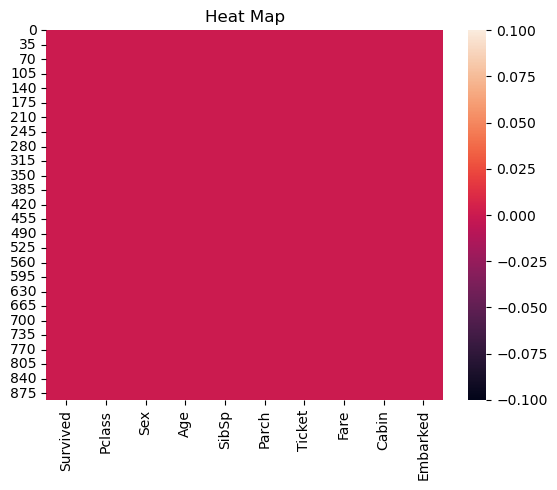

In [10]:
sb.heatmap(ds.isnull())#Visualizing null values via Heatmap
plt.title('Heat Map')
plt.show()

All the null values have been handled.

In [11]:
#Checking for duplicates vales in dataframe
print(f'Total duplicates values present in DataFrame are {ds.duplicated().sum()}.')

Total duplicates values present in DataFrame are 16.


In [12]:
temp=ds[ds.duplicated()]#creating new dataframe with duplicate values
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
201,0,3,male,28.00,8,2,CA. 2343,69.5500,B96 B98,S
324,0,3,male,28.00,8,2,CA. 2343,69.5500,B96 B98,S
409,0,3,female,28.00,3,1,4133,25.4667,B96 B98,S
413,0,2,male,28.00,0,0,239853,0.0000,B96 B98,S
466,0,2,male,28.00,0,0,239853,0.0000,B96 B98,S
485,0,3,female,28.00,3,1,4133,25.4667,B96 B98,S
612,1,3,female,28.00,1,0,367230,15.5000,B96 B98,Q
641,1,1,female,24.00,0,0,PC 17477,69.3000,B35,C
644,1,3,female,0.75,2,1,2666,19.2583,B96 B98,C
692,1,3,male,28.00,0,0,1601,56.4958,B96 B98,S


These are the duplicate values present in the DataFrame.

In [13]:
#Droping duplicate values
ds.drop_duplicates(inplace=True)
#Checking again for duplicates vales in dataframe
print(f'Total duplicates values present in DataFrame are {ds.duplicated().sum()}.')

Total duplicates values present in DataFrame are 0.


All the duplicates have been handled.

In [14]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,B96 B98,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


Now the DataFrame have 875 rows.

In [15]:
ds.info()#Checking more information related to dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  875 non-null    int64  
 1   Pclass    875 non-null    int64  
 2   Sex       875 non-null    object 
 3   Age       875 non-null    float64
 4   SibSp     875 non-null    int64  
 5   Parch     875 non-null    int64  
 6   Ticket    875 non-null    object 
 7   Fare      875 non-null    float64
 8   Cabin     875 non-null    object 
 9   Embarked  875 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 75.2+ KB


This shows information related to the columns and about their Non-null count and Dtype. It also shows the memory usage , which is 76.7+KB in this case.

In [16]:
col=ds.columns.tolist() #Storing columns name into list
for i in col:#Iterating col variable
    print('\n',i,':-\nUnique values:',ds[i].unique(),'\nNumber of unique values:',ds[i].nunique(),'\n\n',ds[i].value_counts().to_frame('Value Counts'))#Printing   


 Survived :-
Unique values: [0 1] 
Number of unique values: 2 

    Value Counts
0           539
1           336

 Pclass :-
Unique values: [3 1 2] 
Number of unique values: 3 

    Value Counts
3           478
1           215
2           182

 Sex :-
Unique values: ['male' 'female'] 
Number of unique values: 2 

         Value Counts
male             568
female           307

 Age :-
Unique values: [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ] 
Number of unique values: 88 

        Value Counts
28.00           18

This gives a breif information about unique values, count of unique values and value counts of each column present in the dataset. Target variable do not have same number of catagorical data  thus this data is not balanced. 

In [17]:
ds.describe()#Using describe function

,Survived,Pclass,Age,SibSp,Parch,Fare
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,0.384000,2.300571,29.417623,0.475429,0.372571,32.007399
std,0.486636,0.838129,13.099904,0.947248,0.802272,49.997091
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.400000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives the statistical information of the numerical columns. From the above description we can observe the following:   
1)All the columns have same count thus there are no missing values.  
2)Mean is greater than 50% in Age,and Fare features which means the data is skewed to the right in these columns.  
3)Mean is less than 50% in Pclass feature which means that the data is skewed to the left in this column.  
4)There is a huge jump between 75% and max in Age,Fare,Parch,and SibSp, hence, there might be outliers present in these columns.

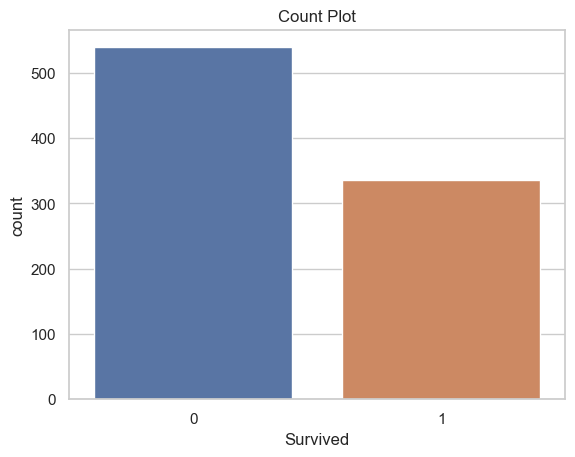

In [18]:
#Visualizing Survived via Count Plot
sb.set_theme(style="whitegrid")
sb.countplot(data=ds,x='Survived')
plt.title("Count Plot")
plt.show()

The number of non survivers are high in compared to survivors.

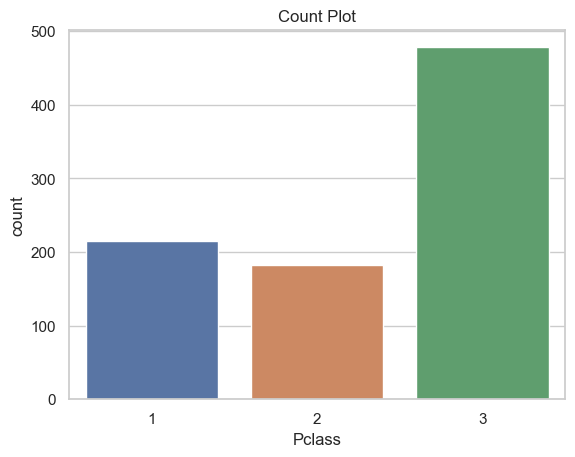

In [19]:
#Visualizing Pclass via Count Plot
sb.countplot(data=ds,x='Pclass')
plt.title("Count Plot")
plt.show()

The third class is comparatively higher than the rest of the classes.The first class is little bit high than the second class.

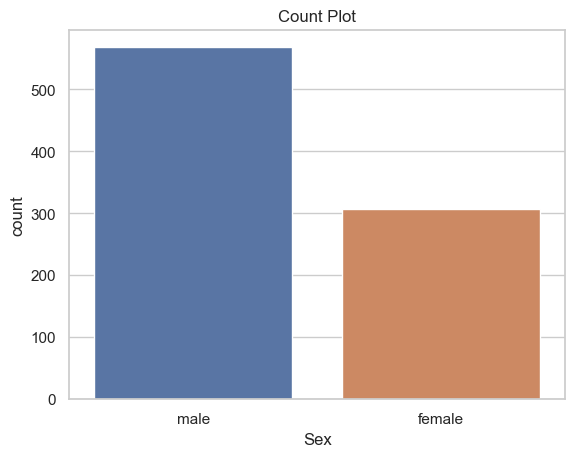

In [20]:
#Visualizing Sex via Count Plot
sb.countplot(data=ds,x='Sex')
plt.title("Count Plot")
plt.show()

The number of male are comparatively higher than females.

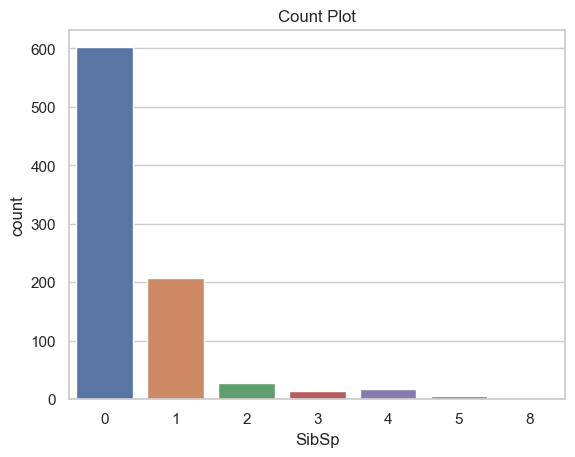

In [21]:
#Visualizing SibSp via Count Plot
sb.countplot(data=ds,x='SibSp')
plt.title("Count Plot")
plt.show()

The number of sibling or spouces with count zero  are comparatively higher than rest of the data.The number of sibling or spouses with count one are fairly high than rest of the data.

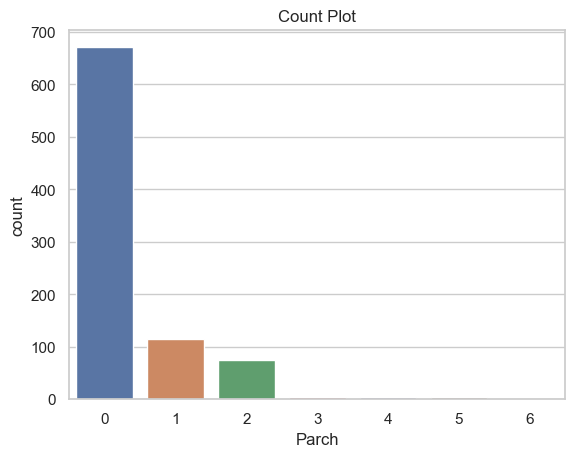

In [22]:
#Visualizing Parch via Count Plot
sb.countplot(data=ds,x='Parch')
plt.title("Count Plot")
plt.show()

The number of parents or children with count zero  are comparatively higher than rest of the data.

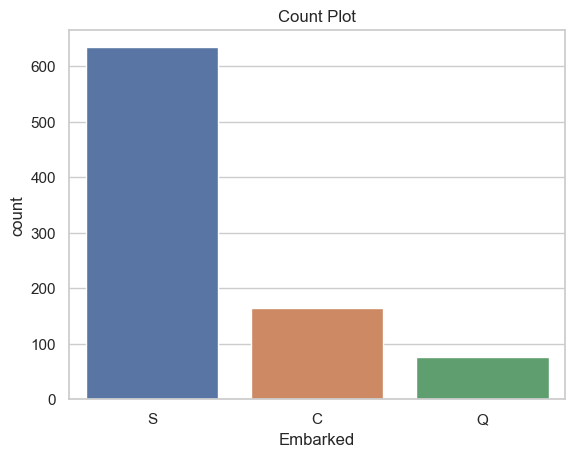

In [23]:
#Visualizing Embarked via Count Plot
sb.countplot(data=ds,x='Embarked')
plt.title("Count Plot")
plt.show()

The number of 'S' embarked  are comparatively higher than rest of the data.

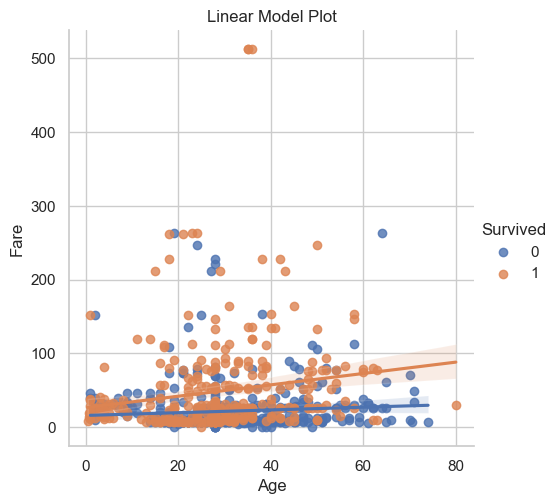

In [24]:
#Checking relation between Age and Fare features,using Survived as a hue via lmplot
sb.lmplot(data=ds,x='Age',y='Fare',hue='Survived')
plt.title('Linear Model Plot')
plt.show()

This graph shows low positive linear relation between Fare and Age features. Survivors are more concentrated around 0-38 Age and 0-300 Fare. 

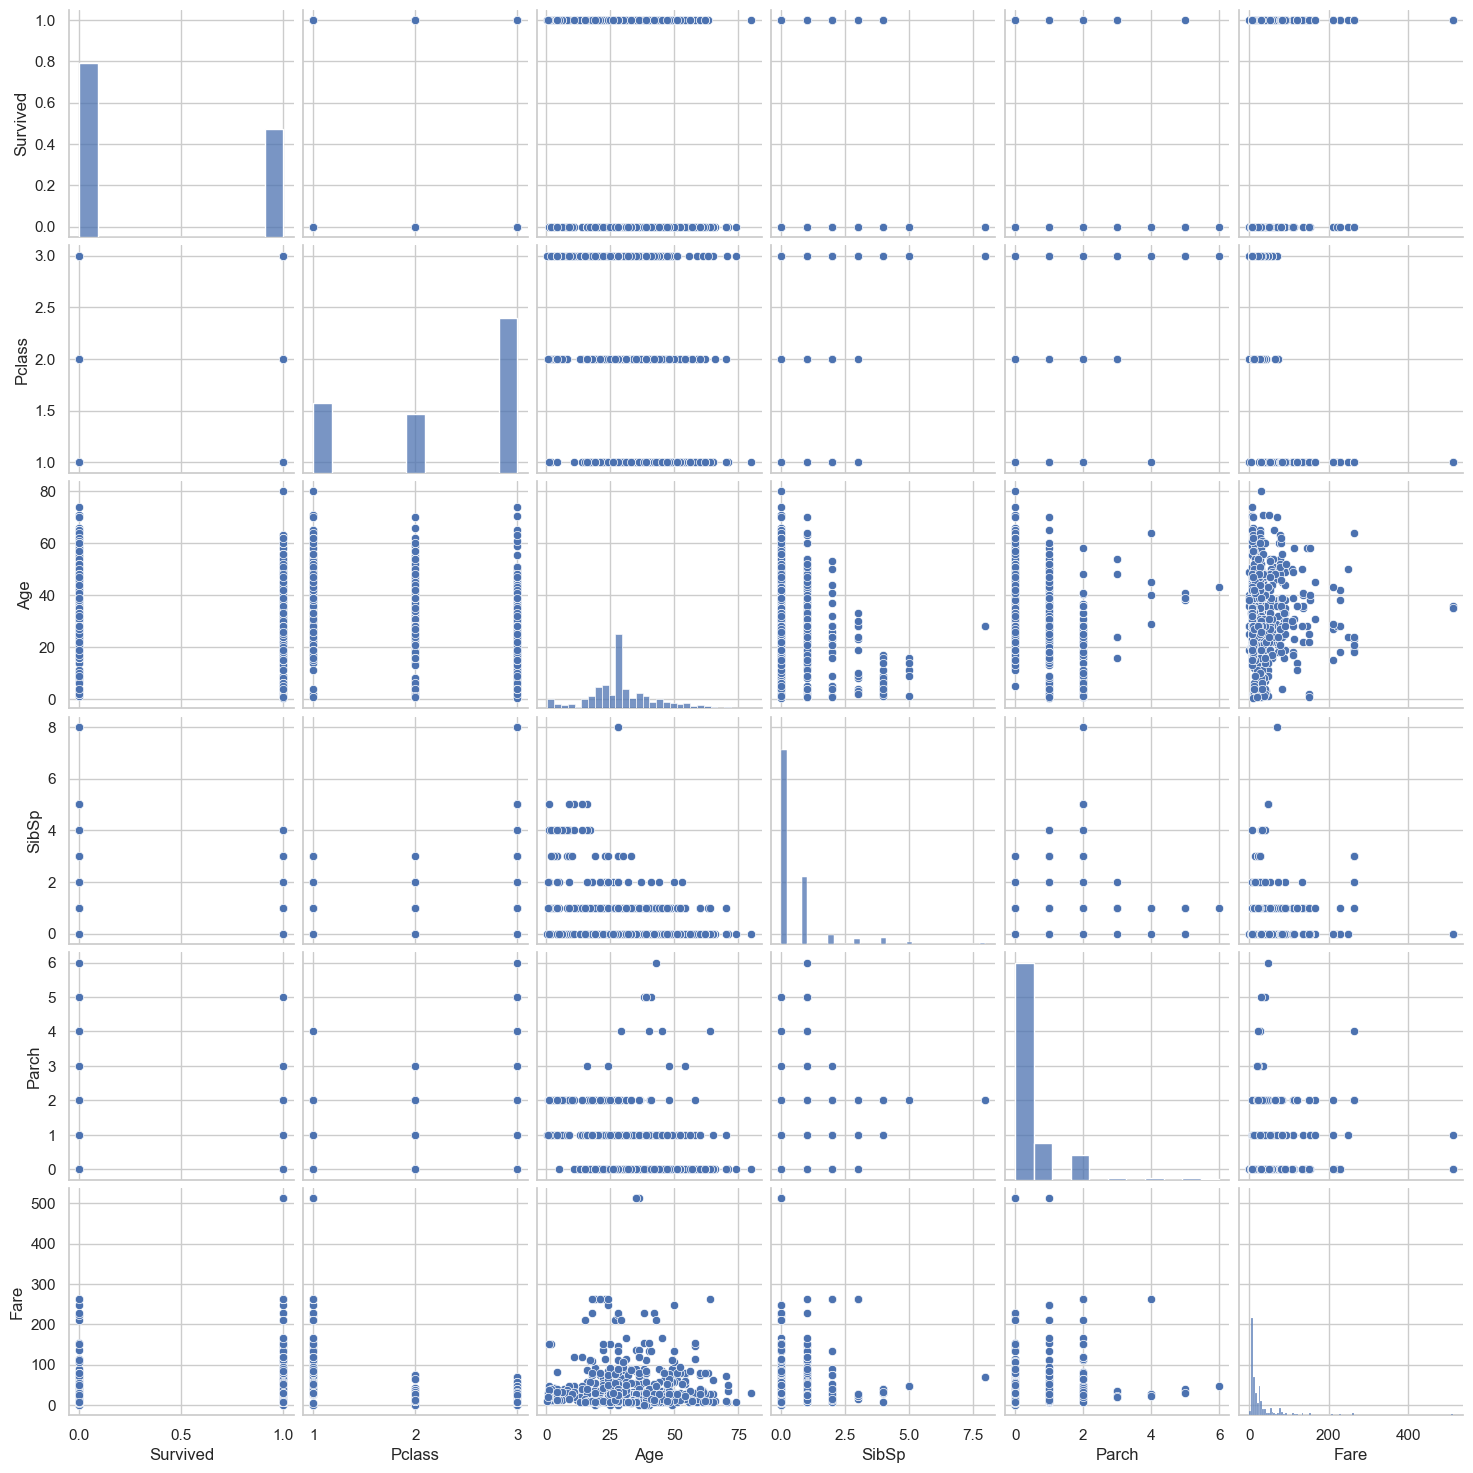

In [25]:
#Visualizing relation between features with multiple plots via Pair plot 
sb.pairplot(data=ds)
plt.show()

This gives pairwise relation ship between the features along with their distribution in the diagonals.

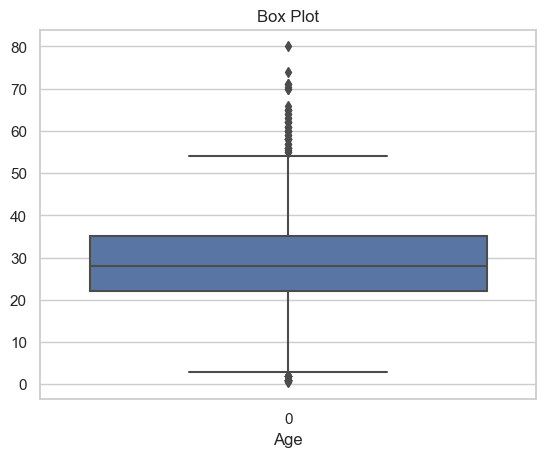

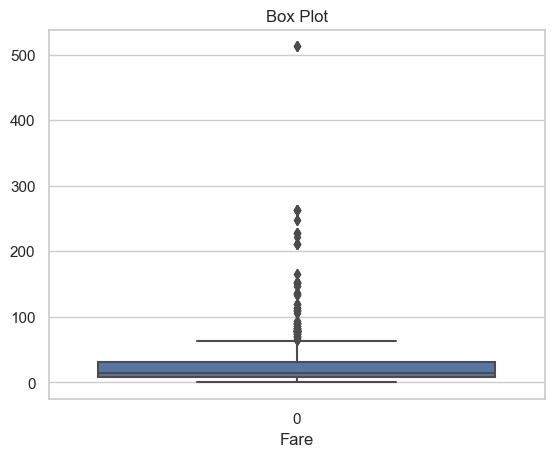

In [26]:
#Checking outliers
a=['Age','Fare']#Creating list
for i in a:
    sb.boxplot(ds[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

There are outliers present in Fare and Age features.

In [27]:
#removing outliers using zscore
#Importing necessary libraries
from scipy.stats import zscore as zs
import numpy as np
f_outlier=ds[['Age','Fare']]
z=np.abs(zs(f_outlier))
z

,Age,Fare
0,0.566559,0.495460
1,0.655523,0.786013
2,0.261038,0.481951
3,0.426382,0.422118
4,0.426382,0.479450
...,...,...
886,0.184658,0.380388
887,0.795699,0.040173
888,0.108278,0.171256
889,0.261038,0.040173


The variables z holds the zscores values of these features.

In [28]:
np.where(z>3)

(array([ 27,  88,  96, 116, 118, 257, 298, 310, 339, 375, 378, 434, 487,
        521, 551, 623, 663, 670, 680, 690, 705, 719, 726, 731, 734, 768,
        836], dtype=int64),
 array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0], dtype=int64))

These are the index of  ouliers present in the features.

In [29]:
z.iloc[27,1]

4.622763112387112

In [30]:
z.iloc[88,1]

4.622763112387112

In [31]:
z.iloc[96,0]

3.17606591134472

In [32]:
z.iloc[836,0]

3.4052061959729856

We have confirmed that these values holds outliers as per the threshold value.

In [33]:
#Removing outliers
zscore=ds[(z<3).all(axis=1)]

In [34]:
#Using IQR method to verify that can it remove outliers with less data loss than zscore method?
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=ds[~((ds< (q1-1.5*iqr)) | (ds>(q3+1.5*iqr))).any(axis=1)]

In [35]:
print('Data loss percentage after removing outliers via zscore',((ds.shape[0]-zscore.shape[0])/ds.shape[0])*100)
print('Data loss percentage after removing outliers via IQR',((ds.shape[0]-IQR.shape[0])/ds.shape[0])*100)

Data loss percentage after removing outliers via zscore 3.085714285714286
Data loss percentage after removing outliers via IQR 18.857142857142858


We can observe that zscore method performed well here, hence, we will update the dataframe with zscore method.

In [36]:
outliers=ds.shape[0]-zscore.shape[0]
print(f'Outliers removed : {outliers}')

Outliers removed : 27


In [37]:
ds=zscore#Updating dataframe

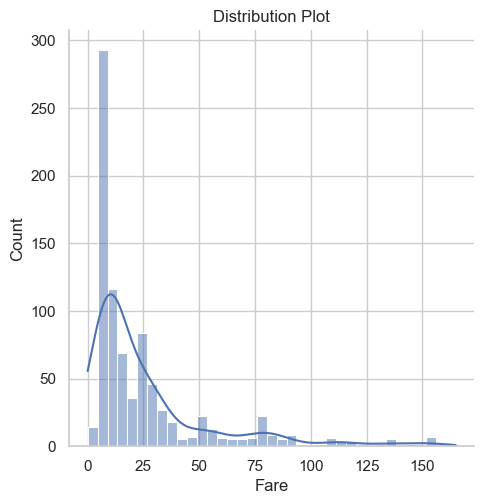

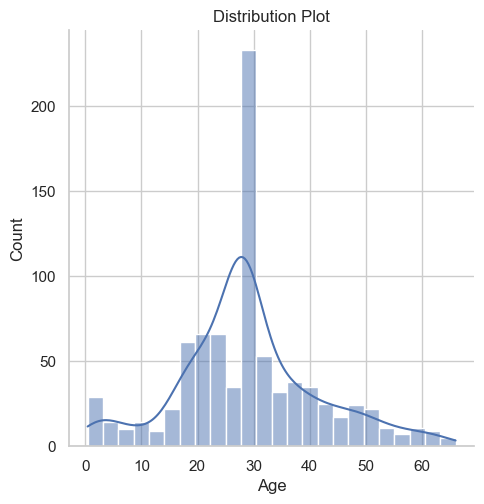

In [38]:
#checking distribution of continous features
a=['Fare','Age']
for i in a:
    sb.displot(ds[i],kde=True)
    plt.title('Distribution Plot')    

Fare feature is skewed to right and Age feature has almost normal distribution.

In [39]:
ds.skew()

Survived    0.501740
Pclass     -0.690453
Age         0.322483
SibSp       3.294242
Parch       2.924930
Fare        2.315828
dtype: float64

Age and Fare feature are only continuous data present , thus we can ignore skewness from the rest of the discrete data. Fare feature do not fall under the acceptable range, thus we can use cuberoot method to remove the skewness.

In [40]:
ds['Fare']=np.cbrt(ds["Fare"])
ds.skew()

Survived    0.501740
Pclass     -0.690453
Age         0.322483
SibSp       3.294242
Parch       2.924930
Fare        0.707293
dtype: float64

Fare feature still have skewness,hence, we can try  squareroot method. 

In [41]:
ds['Fare']=np.sqrt(ds["Fare"])
ds.skew()

Survived    0.501740
Pclass     -0.690453
Age         0.322483
SibSp       3.294242
Parch       2.924930
Fare       -1.471638
dtype: float64

Fare feature still have skewness,hence, we can try  yeojohnson method. 

In [42]:
from scipy.stats import yeojohnson as yj
ds['Fare'],lambda_v=yj(ds['Fare'])
ds.skew()

Survived    0.501740
Pclass     -0.690453
Age         0.322483
SibSp       3.294242
Parch       2.924930
Fare        0.276441
dtype: float64

Skewness from Fare feature is removed.

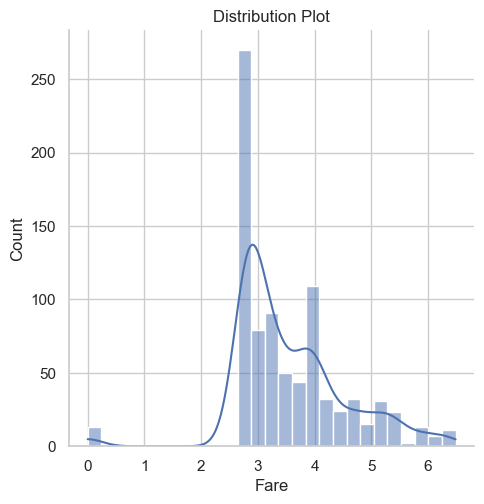

In [43]:
sb.displot(ds['Fare'],kde=True)
plt.title('Distribution Plot')
plt.show()

Distribution of Fare feature is almost normal.

In [44]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,2.779837,B96 B98,S
1,1,1,female,38.0,1,0,PC 17599,5.122249,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,2.844274,B96 B98,S
3,1,1,female,35.0,1,0,113803,4.721656,C123,S
4,0,3,male,35.0,0,0,373450,2.855777,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,3.234949,B96 B98,S
887,1,1,female,19.0,0,0,112053,4.041187,B42,S
888,0,3,female,28.0,1,2,W./C. 6607,3.782278,B96 B98,S
889,1,1,male,26.0,0,0,111369,4.041187,C148,C


In [45]:
ds['Sex']=le.fit_transform(ds['Sex'])#Transforming Sex feature
ds['Ticket']=le.fit_transform(ds['Ticket'])#Transforming Ticket feature
ds['Cabin']=le.fit_transform(ds['Cabin'])#Transforming Cabin feature
ds['Embarked']=le.fit_transform(ds['Embarked'])#Transforming Ticket feature
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,517,2.779837,40,2
1,1,1,0,38.0,1,0,587,5.122249,70,0
2,1,3,0,26.0,0,0,655,2.844274,40,2
3,1,1,0,35.0,1,0,48,4.721656,48,2
4,0,3,1,35.0,0,0,466,2.855777,40,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,99,3.234949,40,2
887,1,1,0,19.0,0,0,14,4.041187,26,2
888,0,3,0,28.0,1,2,661,3.782278,40,2
889,1,1,1,26.0,0,0,8,4.041187,53,0


All the catagorical data have been encoded.  
In Sex feature,'1' represents 'male' and '0' represents 'female'.  
In Embarked feature,'0' represents 'C', '1' represents 'Q' and '2' represents 'S'.  

In [46]:
#Checking correlation between independant and dependant varibales
cor=ds.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.337365,-0.542783,-0.056195,-0.011374,0.092115,-0.172294,0.326282,0.196510,-0.151193
Pclass,-0.337365,1.000000,0.127137,-0.347981,0.066326,0.039712,0.365623,-0.644781,-0.285001,0.130817
Sex,-0.542783,0.127137,1.000000,0.061934,-0.112409,-0.251541,0.073535,-0.260322,-0.109576,0.101545
Age,-0.056195,-0.347981,0.061934,1.000000,-0.266799,-0.187176,-0.100056,0.117225,0.092600,-0.014771
SibSp,-0.011374,0.066326,-0.112409,-0.266799,1.000000,0.383792,0.050297,0.308519,-0.000056,0.051215
Parch,0.092115,0.039712,-0.251541,-0.187176,0.383792,1.000000,0.021266,0.284556,0.026841,0.042587
Ticket,-0.172294,0.365623,0.073535,-0.100056,0.050297,0.021266,1.000000,-0.155803,-0.068343,0.038460
Fare,0.326282,-0.644781,-0.260322,0.117225,0.308519,0.284556,-0.155803,1.000000,0.245097,-0.175573
Cabin,0.196510,-0.285001,-0.109576,0.092600,-0.000056,0.026841,-0.068343,0.245097,1.000000,0.011898
Embarked,-0.151193,0.130817,0.101545,-0.014771,0.051215,0.042587,0.038460,-0.175573,0.011898,1.000000


This gives us correlation among the columns.

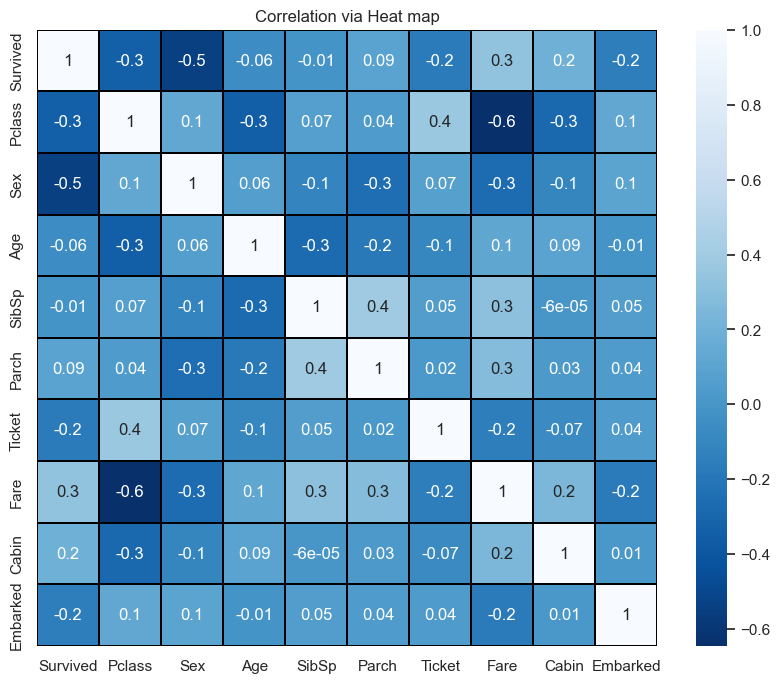

In [47]:
#Visualizing correlation
plt.figure(figsize=(10, 8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:    
1)There is no much correlation between features and target variable.    
2)Cabin, Fare Parch,and Sibling or Spouses feature have less  positve correlation with the target variable.      
3)Embarked, Ticket,Age and Pclass features have low negative correlation with the target variable, and Sex feature have moderate negative correlation with target variable.  
4)Fare and Pclass features have moderate negative correlation with each other. 

In [48]:
#Separating features and target variable 
x=ds.drop('Survived',axis=1)
y=ds['Survived']

In [49]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape[0],'\nDimensions of label:',y.shape[0])

Dimensions of features: 848 
Dimensions of label: 848


We can observe that both label and features have same number of dimensions.

In [50]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc
sc=sc()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.808929,0.730379,-0.559254,0.559776,-0.453879,0.954153,-0.779189,-0.302622,0.572486
1,-1.627916,-1.369152,0.713697,0.559776,-0.453879,1.311861,1.573793,1.059018,-2.002943
2,0.808929,-1.369152,-0.241016,-0.499800,-0.453879,1.659349,-0.714461,-0.302622,0.572486
3,-1.627916,-1.369152,0.475019,0.559776,-0.453879,-1.442495,1.171392,0.060482,0.572486
4,0.808929,0.730379,0.475019,-0.499800,-0.453879,0.693536,-0.702906,-0.302622,0.572486
...,...,...,...,...,...,...,...,...,...
843,-0.409493,0.730379,-0.161457,-0.499800,-0.453879,-1.181878,-0.322023,-0.302622,0.572486
844,-1.627916,-1.369152,-0.797932,-0.499800,-0.453879,-1.616239,0.487853,-0.938055,0.572486
845,0.808929,-1.369152,-0.081897,0.559776,2.078288,1.690010,0.227776,-0.302622,0.572486
846,-1.627916,0.730379,-0.241016,-0.499800,-0.453879,-1.646899,0.487853,0.287422,-2.002943


The data is scaled using StandarScaler method to overcome the issue of biasness.

In [51]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library
v=pd.DataFrame()
v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]
v['Features']=x.columns
v

,VIF,Features
0,2.546954,Pclass
1,1.133110,Sex
2,1.241334,Age
3,1.422365,SibSp
4,1.337296,Parch
5,1.177636,Ticket
6,2.525431,Fare
7,1.107111,Cabin
8,1.064070,Embarked


Here we can observe that the features do not have multicollineraity problem.

In [52]:
y.value_counts()

0    527
1    321
Name: Survived, dtype: int64

As the data in target variable is not balanced , we can use oversampling method.

In [53]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [54]:
y1.value_counts()

0    527
1    527
Name: Survived, dtype: int64

The data is balanced now.

In [55]:
#checking how much data is sampled  
print('Dimensions of features before sampling:',x.shape[0],'\nDimensions of label before sampling:',y.shape[0],'\nDimensions of features after sampling:',x1.shape[0],'\nDimensions of label after sampling:',y1.shape[0],'\nDiffernce = ',x1.shape[0]-x.shape[0])
#Updating
x=x1
y=y1

Dimensions of features before sampling: 848 
Dimensions of label before sampling: 848 
Dimensions of features after sampling: 1054 
Dimensions of label after sampling: 1054 
Differnce =  206


In [56]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score 
#Finding best random state
ac_updater=0
rs_updater=0
for i in range(1,400):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
    RFR=rfc()
    RFR.fit(x_train,y_train)
    pr=RFR.predict(x_test)
    ac=accuracy_score(y_test,pr)
    if ac>ac_updater:
        ac_updater=ac
        rs_updater=i
print('Max accuracy score during the iteration is ',ac_updater,'on randome state : ',rs_updater)

Max accuracy score during the iteration is  0.9022082018927445 on randome state :  354


In [57]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)

In [58]:
#Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC as SupportVectorClassifier
from sklearn.model_selection import cross_val_score as cvs

#Creating instance
LR=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
BC=BaggingClassifier()
SVC=SupportVectorClassifier()

log=float('inf')#Initializing 'log' variable  to positive infinity

models=[LR,RFC,ETC,GBC,ABC,BC,SVC]#Creating list
    
for i in models:#Iterating models 
    i.fit(x_train,y_train)
    pr=i.predict(x_test)
    A_score=accuracy_score(y_test,pr)
    C_matrix=confusion_matrix(y_test,pr)
    C_report=classification_report(y_test,pr)
    score=cvs(i,x,y)
    diff=abs(A_score - score.mean())*100
    
    #Printing    
    print('\n','Accuracy score of',str(i).split('(')[0],'is',A_score,'\n','Confusion matrix of',str(i).split('(')[0],':\n',C_matrix,'\n','Classification report of ',str(i).split('(')[0],':\n',C_report,'\n')
    print('\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between Accuracy score and cross validation is ',diff)

    if diff<log:#Using if condition to compare 'diff' and 'log' variable 
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between R2 score and cross validation i.e {b_d}')#Printing 


 Accuracy score of LogisticRegression is 0.8359621451104101 
 Confusion matrix of LogisticRegression :
 [[127  26]
 [ 26 138]] 
 Classification report of  LogisticRegression :
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       153
           1       0.84      0.84      0.84       164

    accuracy                           0.84       317
   macro avg       0.84      0.84      0.84       317
weighted avg       0.84      0.84      0.84       317
 


Cross validation Score of LogisticRegression is [0.7535545  0.8056872  0.77251185 0.81516588 0.81428571] 
Mean:  0.792241029113067 
Difference between Accuracy score and cross validation is  4.372111599734307

 Accuracy score of RandomForestClassifier is 0.8990536277602523 
 Confusion matrix of RandomForestClassifier :
 [[138  15]
 [ 17 147]] 
 Classification report of  RandomForestClassifier :
               precision    recall  f1-score   support

           0       0.89      0.90     

Here by comparing difference of accuracy  score and cross validation  of various models, we can conclude that ExtraTreesClassifier is the best performing model.

In [61]:
#Using GridSearchCV 
from sklearn.model_selection import GridSearchCV as GSC#Importing required library
pa={'n_estimators':[50,100,150],'criterion':['gini','entropy','log_loss'],'max_depth':['None', 10, 20],'min_samples_split':[2, 5, 10],'min_samples_leaf': [1,4]}
gsc=GSC(ETC,pa)
gsc.fit(x_train,y_train)
gsc.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [63]:
#Creating new model with best parameters provided by GridSearchCV
final=ExtraTreesClassifier(criterion='gini',max_depth=20,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
final.fit(x_train,y_train)
pr=final.predict(x_test)
ac=accuracy_score(y_test,pr)
print(ac)

0.8801261829652997


Model's accuracy score is increased from 84% to 88%.

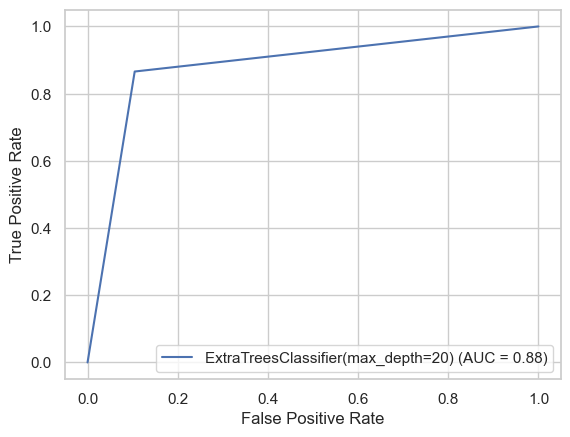

In [64]:
#Plotimg roc curve
#Importing necessary libraries
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds=roc_curve(y_test,pr)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)
display.plot()
plt.show()

Here the AUC value is 0.88.

In [66]:
#Conclusion
Predicted_values=final.predict(x_test)
Original_values=y_test
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})
conclusion.sample(20)

,Predicted Values,Original Values
308,0,0
673,0,0
318,1,1
386,1,1
317,1,1
77,1,1
960,1,1
339,0,0
468,1,1
356,1,1


In [69]:
conclusion.sample(20)

,Predicted Values,Original Values
775,0,0
432,0,1
943,1,1
240,1,0
213,0,0
202,1,1
781,0,0
753,0,0
815,1,1
252,1,1


Here we can conclude that the model predicted values are fairly close enough to the original values. 

In [68]:
#Saving the model
import joblib
joblib.dump(final,r'D:\Models\TS.obj')

['D:\\Models\\TS.obj']